# Grunnkrets investigation

In [47]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from utils import group_df, preprocess_grunnkrets_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
age_distribution = pd.read_csv("data/grunnkrets_age_distribution.csv")
age_distribution.shape

(22620, 93)

In [49]:
age_distribution.head()

,grunnkrets_id,year,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,16013117,2015,14,14,14,14,13,13,12,11,...,0,0,0,0,0,0,0,0,0,0
1,16013117,2016,10,10,10,10,10,10,9,9,...,0,0,0,0,0,0,0,0,0,0
2,11030206,2015,5,5,5,5,5,4,4,3,...,0,0,0,0,0,0,0,0,0,0
3,16011203,2016,2,2,2,2,2,3,3,3,...,1,1,1,1,1,1,1,0,0,0
4,3011601,2016,7,7,7,7,6,6,5,4,...,1,1,0,0,0,0,0,0,0,0


Look at the distribution of stores at different granularities (grunnkrets, delomrade, kommune, fylke) 

In [50]:
from sklearn.model_selection import train_test_split

stores_train = pd.read_csv("data/stores_train.csv")
stores_train, _ = train_test_split(stores_train, test_size=0.2, random_state=0)
stores_train_explore = stores_train[ ['grunnkrets_id'] ].copy()
stores_train_explore["store_count"] = 1
stores_train_explore

,grunnkrets_id,store_count
2506,6020601,1
12305,2350203,1
4142,6240307,1
8561,15040206,1
818,3012312,1
...,...,...
4859,18330207,1
3264,16017522,1
9845,15040101,1
10799,12012008,1


In [51]:
stores_train_explore.shape

(10287, 2)

In [52]:
from utils import create_geographical_columns, group_df
stores_train_explore = create_geographical_columns(stores_train_explore)


In [53]:
group_df(stores_train_explore, 'grunnkrets_id')[ ['store_count'] ].value_counts()

store_count
1              1842
2               581
3               285
4               158
5               107
6                79
7                58
8                44
9                40
11               28
10               24
12               19
13               16
14               13
15               11
16               11
18               11
19                8
20                8
17                7
23                6
24                5
21                4
28                4
25                4
32                4
22                3
26                3
29                2
30                2
37                2
27                1
31                1
33                1
35                1
36                1
41                1
42                1
44                1
47                1
51                1
61                1
67                1
dtype: int64

This is very sparsely populated 

In [54]:
group_df(stores_train_explore, 'delomrade')[ ['store_count'] ].value_counts()

store_count
1              269
2              192
3              133
4              114
5               76
              ... 
48               1
27               1
42               1
40               1
205              1
Length: 65, dtype: int64

We see that each delomrade is also quite sparsely populated, except for a few

In [55]:
group_df(stores_train_explore, 'kommune')[ ['store_count'] ].value_counts()

store_count
4              39
1              30
5              29
3              26
8              26
               ..
53              1
52              1
51              1
50              1
1481            1
Length: 76, dtype: int64

We see that most "kommuner" contain few stores

In [56]:
group_df(stores_train_explore, 'fylke')[ ['store_count'] ].value_counts()

store_count
213            1
505            1
944            1
860            1
854            1
592            1
586            1
581            1
573            1
462            1
241            1
414            1
379            1
364            1
360            1
345            1
275            1
258            1
1481           1
dtype: int64

We can see that each fylke contains many stores

IDEAS: group by grunnkrets_id, first 2 digits is "fylke", first 4 corresponds to "kommune" (see https://no.wikipedia.org/wiki/Grunnkretser_i_Norge). First 6 digits are also related in some sense.

In [57]:
age_distribution = preprocess_grunnkrets_df(age_distribution, "grunnkrets_id")

In [58]:
age_list = []
for col in list(age_distribution.columns):
    if col.startswith("age"):
        _, age_num = col.split("_")
        age_list.append([int(age_num), col])
age_list = sorted(age_list, key=lambda x: (x[0]))
age_list

[[0, 'age_0'],
 [1, 'age_1'],
 [2, 'age_2'],
 [3, 'age_3'],
 [4, 'age_4'],
 [5, 'age_5'],
 [6, 'age_6'],
 [7, 'age_7'],
 [8, 'age_8'],
 [9, 'age_9'],
 [10, 'age_10'],
 [11, 'age_11'],
 [12, 'age_12'],
 [13, 'age_13'],
 [14, 'age_14'],
 [15, 'age_15'],
 [16, 'age_16'],
 [17, 'age_17'],
 [18, 'age_18'],
 [19, 'age_19'],
 [20, 'age_20'],
 [21, 'age_21'],
 [22, 'age_22'],
 [23, 'age_23'],
 [24, 'age_24'],
 [25, 'age_25'],
 [26, 'age_26'],
 [27, 'age_27'],
 [28, 'age_28'],
 [29, 'age_29'],
 [30, 'age_30'],
 [31, 'age_31'],
 [32, 'age_32'],
 [33, 'age_33'],
 [34, 'age_34'],
 [35, 'age_35'],
 [36, 'age_36'],
 [37, 'age_37'],
 [38, 'age_38'],
 [39, 'age_39'],
 [40, 'age_40'],
 [41, 'age_41'],
 [42, 'age_42'],
 [43, 'age_43'],
 [44, 'age_44'],
 [45, 'age_45'],
 [46, 'age_46'],
 [47, 'age_47'],
 [48, 'age_48'],
 [49, 'age_49'],
 [50, 'age_50'],
 [51, 'age_51'],
 [52, 'age_52'],
 [53, 'age_53'],
 [54, 'age_54'],
 [55, 'age_55'],
 [56, 'age_56'],
 [57, 'age_57'],
 [58, 'age_58'],
 [59, 'age_59'],


## Age distribution 

In [59]:
from utils import group_age_columns, preprocess_grunnkrets_df

pro_age_distribution = preprocess_grunnkrets_df(age_distribution)

new_age_distribution = group_age_columns(age_distribution_df=age_distribution, span_size=7)

In [60]:
new_age_distribution.head()

,grunnkrets_id,year,fylke,kommune,delomrade,age_0-6,age_7-13,age_14-20,age_21-27,age_28-34,age_35-41,age_42-48,age_49-55,age_56-62,age_63-69,age_70-76,age_77-83,age_84-90
6784,2190812,2015,2,219,21908,0,0,0,3,16,21,18,14,7,1,0,0,0
8175,2190914,2015,2,219,21909,29,54,46,35,23,32,44,47,33,22,12,7,5
8529,20300310,2015,20,2030,203003,2,0,6,16,24,11,7,7,7,0,0,0,0
8577,5170101,2015,5,517,51701,2,0,5,19,32,14,1,0,3,0,0,0,0
16348,2191013,2015,2,219,21910,71,70,36,44,63,76,67,50,47,37,28,25,9


In [61]:
from utils import merge_age_columns_list
custom_age_list = [(0,19), (19, 31 ), (31, 56), (56, 91 )]
custom_age_bins = ['c_age_0-18',	'c_age_19-30',	'c_age_31-55',	'c_age_56-90']
custom_age_df = merge_age_columns_list(pro_age_distribution, custom_age_list)
custom_age_df

,grunnkrets_id,year,fylke,kommune,delomrade,c_age_0-18,c_age_19-30,c_age_31-55,c_age_56-90
6784,2190812,2015,2,219,21908,0,9,63,8
21504,12240103,2015,12,1224,122401,12,14,30,26
21506,12240306,2015,12,1224,122403,24,9,22,17
2186,12340102,2015,12,1234,123401,16,21,21,31
2181,11340310,2015,11,1134,113403,24,17,24,18
...,...,...,...,...,...,...,...,...,...
5011,3013706,2016,3,301,30137,67,37,101,51
5014,4020108,2016,4,402,40201,74,39,101,117
5016,4020503,2016,4,402,40205,74,35,109,94
20891,2270305,2016,2,227,22703,28,18,62,45


This allows us to group by either "fylke", "kommune", "delomrade" or "grunnkrets"

We can now do this for all grunnkrets-related dataframes

Join in the age bins for different geographical units

In [62]:
from utils import join_grouped_df, age_bins

full_population_df = create_geographical_columns(stores_train)

full_population_df = join_grouped_df(full_population_df, new_age_distribution[age_bins(age_list, span_size=7) + ['grunnkrets_id']], 'grunnkrets_id')
full_population_df = join_grouped_df(full_population_df, new_age_distribution[age_bins(age_list, span_size=7) + ['delomrade']], 'delomrade')
full_population_df = join_grouped_df(full_population_df, new_age_distribution[age_bins(age_list, span_size=7) + ['kommune']], 'kommune')
full_population_df = join_grouped_df(full_population_df, new_age_distribution[age_bins(age_list, span_size=7) + ['fylke']], 'fylke')
full_population_df = join_grouped_df(full_population_df, custom_age_df[custom_age_bins + ['grunnkrets_id']], 'grunnkrets_id')
full_population_df = join_grouped_df(full_population_df, custom_age_df[custom_age_bins + ['delomrade']], 'delomrade')
full_population_df = join_grouped_df(full_population_df, custom_age_df[custom_age_bins + ['kommune']], 'kommune')
full_population_df = join_grouped_df(full_population_df, custom_age_df[custom_age_bins + ['fylke']], 'fylke')


### Mean and median age

In [63]:
from utils import merge_columns_mean
from utils import merge_age_columns_mean
from utils import merge_age_columns_sum

new_age_distribution2 = pd.read_csv("data/grunnkrets_age_distribution.csv")
new_age_distribution2 = preprocess_grunnkrets_df(new_age_distribution2)

Mean age for each grunnkrets

In [64]:
mean_ages_grunnkrets = merge_age_columns_mean(new_age_distribution2, 'grunnkrets_id')
mean_ages_grunnkrets.describe()

,grunnkrets_id.mean_age
count,11379.000000
mean,40.058491
std,5.000218
min,21.694444
25%,36.874665
50%,39.684000
75%,42.807146
max,81.190476


In [65]:
mean_ages_grunnkrets['grunnkrets_id.mean_age'].isna().sum()

0

Delomrade

In [66]:
mean_ages_delomrade = merge_age_columns_mean(new_age_distribution2, 'delomrade')
mean_ages_delomrade.describe()

,delomrade.mean_age
count,1541.000000
mean,40.195220
std,3.203201
min,29.243990
25%,37.966243
50%,40.102068
75%,42.268260
max,54.132353


In [67]:
mean_ages_delomrade['delomrade.mean_age'].isna().sum()

0

Kommune

In [68]:
mean_ages_kommune = merge_age_columns_mean(new_age_distribution2, 'kommune')
mean_ages_kommune.describe()

,kommune.mean_age
count,428.000000
mean,40.860425
std,2.415133
min,33.826465
25%,39.101782
50%,41.044260
75%,42.622069
max,47.307203


In [69]:
mean_ages_kommune['kommune.mean_age'].isna().sum()

0

Fylke

In [70]:
mean_ages_fylke = merge_age_columns_mean(new_age_distribution2, 'fylke')
mean_ages_fylke.describe()

,fylke.mean_age
count,19.000000
mean,39.530080
std,1.494322
min,36.713186
25%,38.424188
50%,39.936194
75%,40.508635
max,42.140772


In [71]:
mean_ages_fylke['fylke.mean_age'].isna().sum()

0

Do the same for total population

In [72]:
tot_pop_grunnkrets = merge_age_columns_sum(new_age_distribution2, 'grunnkrets_id')
tot_pop_grunnkrets.describe()

,grunnkrets_id.tot_pop
count,11379.00000
mean,449.91291
std,431.94708
min,59.00000
25%,167.00000
50%,308.00000
75%,575.00000
max,5993.00000


In [73]:
tot_pop_grunnkrets['grunnkrets_id.tot_pop'].isna().sum()

0

In [74]:
tot_pop_delomrade = merge_age_columns_sum(new_age_distribution2, 'delomrade')
tot_pop_delomrade

,delomrade.tot_pop
delomrade,
10101,7812
10102,9267
10103,4404
10104,4011
10105,2050
...,...
203001,387
203002,4584
203003,3642


In [75]:
tot_pop_kommune = merge_age_columns_sum(new_age_distribution2, 'kommune')
tot_pop_kommune.describe()

,kommune.tot_pop
count,428.000000
mean,11961.586449
std,38203.092998
min,201.000000
25%,1990.500000
50%,4505.500000
75%,10510.250000
max,665638.000000


In [76]:
tot_pop_fylke = merge_age_columns_sum(new_age_distribution2, 'fylke')
tot_pop_fylke.describe()

,fylke.tot_pop
count,19.000000
mean,269450.473684
std,168589.355280
min,71233.000000
25%,162694.500000
50%,229962.000000
75%,297173.500000
max,665638.000000


Merge into main df

In [77]:
full_population_df=full_population_df.merge(mean_ages_grunnkrets, how='left', right_index=True, left_on='grunnkrets_id')
full_population_df=full_population_df.merge(mean_ages_delomrade, how='left', right_index=True, left_on='delomrade')
full_population_df=full_population_df.merge(mean_ages_kommune, how='left', right_index=True, left_on='kommune')
full_population_df=full_population_df.merge(mean_ages_fylke, how='left', right_index=True, left_on='fylke')
full_population_df=full_population_df.merge(tot_pop_grunnkrets, how='left', right_index=True, left_on='grunnkrets_id')
full_population_df=full_population_df.merge(tot_pop_delomrade, how='left', right_index=True, left_on='delomrade')
full_population_df=full_population_df.merge(tot_pop_kommune, how='left', right_index=True, left_on='kommune')
full_population_df=full_population_df.merge(tot_pop_fylke, how='left', right_index=True, left_on='fylke')

In [78]:
full_population_df['grunnkrets_id'].isna().sum()

0

In [79]:
mean_ages_grunnkrets.index.isna().sum()

0

In [80]:
full_population_df.shape

(10287, 91)

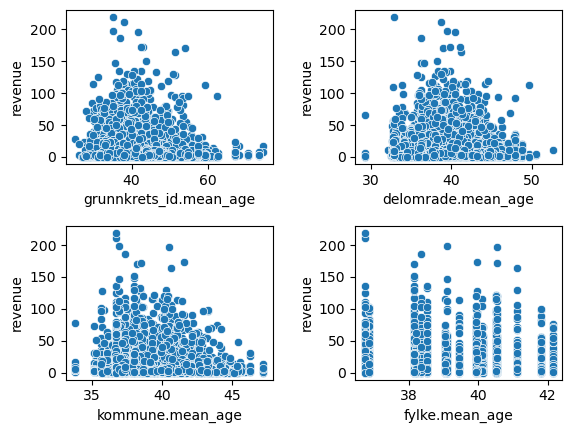

In [81]:
from plot_utils import quad_geo_scatter
quad_geo_scatter(full_population_df, 'mean_age')

In [82]:
full_population_df[['revenue','grunnkrets_id.mean_age', 'delomrade.mean_age', 'kommune.mean_age', 'fylke.mean_age', ]].corr().head(1)

,revenue,grunnkrets_id.mean_age,delomrade.mean_age,kommune.mean_age,fylke.mean_age
revenue,1.0,-0.030029,-0.057971,-0.034496,-0.005362


In [83]:
full_population_df[['revenue']+[ f'grunnkrets_id.{i}' for i in age_bins(age_list, span_size=7)]].corr().head(1)

,revenue,grunnkrets_id.age_0-6,grunnkrets_id.age_7-13,grunnkrets_id.age_14-20,grunnkrets_id.age_21-27,grunnkrets_id.age_28-34,grunnkrets_id.age_35-41,grunnkrets_id.age_42-48,grunnkrets_id.age_49-55,grunnkrets_id.age_56-62,grunnkrets_id.age_63-69,grunnkrets_id.age_70-76,grunnkrets_id.age_77-83,grunnkrets_id.age_84-90
revenue,1.0,0.01462,0.015664,0.018087,0.00485,0.000687,0.005873,0.010822,0.009239,0.006265,-0.00417,-0.009109,-0.004204,-0.001976


In [84]:
full_population_df[['revenue']+[ f'grunnkrets_id.{i}' for i in custom_age_bins]].corr().head(1)

,revenue,grunnkrets_id.c_age_0-18,grunnkrets_id.c_age_19-30,grunnkrets_id.c_age_31-55,grunnkrets_id.c_age_56-90
revenue,1.0,0.01638,0.004677,0.007095,-0.002505


In [85]:
full_population_df[['revenue']+[ f'delomrade.{i}' for i in age_bins(age_list, span_size=7)]].corr().head(1)

,revenue,delomrade.age_0-6,delomrade.age_7-13,delomrade.age_14-20,delomrade.age_21-27,delomrade.age_28-34,delomrade.age_35-41,delomrade.age_42-48,delomrade.age_49-55,delomrade.age_56-62,delomrade.age_63-69,delomrade.age_70-76,delomrade.age_77-83,delomrade.age_84-90
revenue,1.0,0.024235,0.024122,0.023133,0.011912,0.009899,0.016274,0.020793,0.019898,0.018408,0.012147,0.007343,0.007292,0.007562


In [86]:
full_population_df[['revenue']+[ f'delomrade.{i}' for i in custom_age_bins]].corr().head(1)

,revenue,delomrade.c_age_0-18,delomrade.c_age_19-30,delomrade.c_age_31-55,delomrade.c_age_56-90
revenue,1.0,0.024144,0.012199,0.017773,0.012276


In [87]:
full_population_df[['revenue']+[ f'kommune.{i}' for i in age_bins(age_list, span_size=7)]].corr().head(1)

,revenue,kommune.age_0-6,kommune.age_7-13,kommune.age_14-20,kommune.age_21-27,kommune.age_28-34,kommune.age_35-41,kommune.age_42-48,kommune.age_49-55,kommune.age_56-62,kommune.age_63-69,kommune.age_70-76,kommune.age_77-83,kommune.age_84-90
revenue,1.0,0.006465,0.007736,0.009398,0.008027,0.00537,0.005788,0.006999,0.007529,0.008076,0.008347,0.008516,0.008348,0.007773


In [88]:
full_population_df[['revenue']+[ f'kommune.{i}' for i in custom_age_bins]].corr().head(1)

,revenue,kommune.c_age_0-18,kommune.c_age_19-30,kommune.c_age_31-55,kommune.c_age_56-90
revenue,1.0,0.007464,0.00745,0.00631,0.008251


In [89]:
full_population_df[['revenue']+[ f'fylke.{i}' for i in age_bins(age_list, span_size=7)]].corr().head(1)

,revenue,fylke.age_0-6,fylke.age_7-13,fylke.age_14-20,fylke.age_21-27,fylke.age_28-34,fylke.age_35-41,fylke.age_42-48,fylke.age_49-55,fylke.age_56-62,fylke.age_63-69,fylke.age_70-76,fylke.age_77-83,fylke.age_84-90
revenue,1.0,0.003941,0.003988,0.005117,0.006769,0.004139,0.003714,0.003678,0.003939,0.005082,0.006023,0.005752,0.006486,0.007392


In [90]:
full_population_df[['revenue']+[ f'fylke.{i}' for i in custom_age_bins]].corr().head(1)

,revenue,fylke.c_age_0-18,fylke.c_age_19-30,fylke.c_age_31-55,fylke.c_age_56-90
revenue,1.0,0.004078,0.00611,0.003873,0.005842


It seems like the custom bins work just as well as the interval ones

In [91]:
from constants import levels
for level in levels:
    for bn in custom_age_bins:
        full_population_df[f'{level}.{bn}_ratio'] = full_population_df[f'{level}.{bn}']/full_population_df[f'{level}.tot_pop']

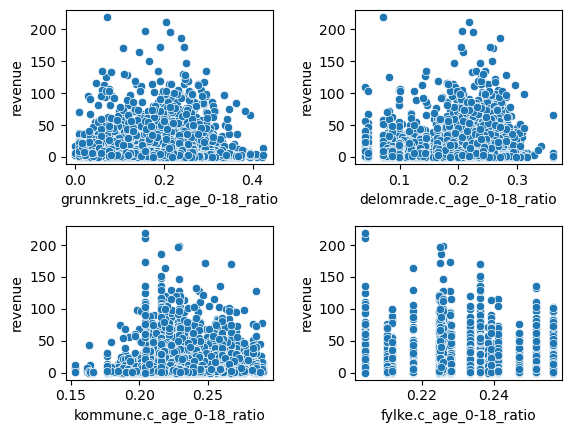

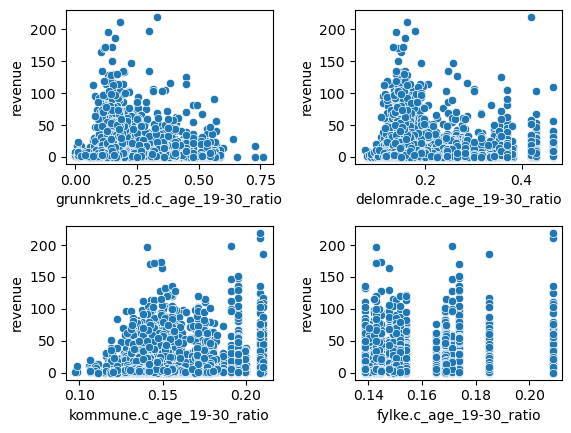

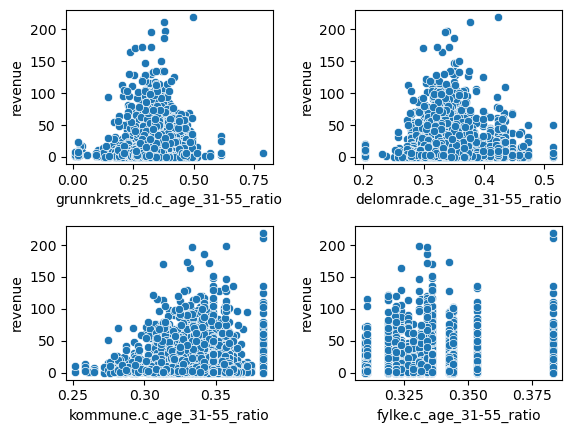

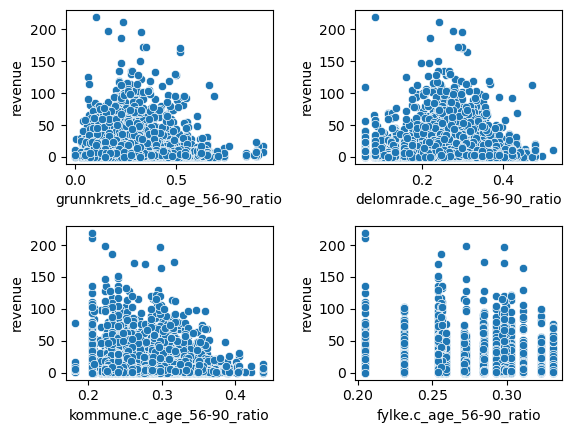

In [92]:
for bn in custom_age_bins:
    quad_geo_scatter(full_population_df, f'{bn}_ratio')


In [93]:
full_population_df[['revenue']+[ f'{i}.{bn}_ratio' for i in levels for bn in custom_age_bins]].corr().head(1)

,revenue,grunnkrets_id.c_age_0-18_ratio,grunnkrets_id.c_age_19-30_ratio,grunnkrets_id.c_age_31-55_ratio,grunnkrets_id.c_age_56-90_ratio,delomrade.c_age_0-18_ratio,delomrade.c_age_19-30_ratio,delomrade.c_age_31-55_ratio,delomrade.c_age_56-90_ratio,kommune.c_age_0-18_ratio,kommune.c_age_19-30_ratio,kommune.c_age_31-55_ratio,kommune.c_age_56-90_ratio,fylke.c_age_0-18_ratio,fylke.c_age_19-30_ratio,fylke.c_age_31-55_ratio,fylke.c_age_56-90_ratio
revenue,1.0,0.036879,-0.000175,0.007283,-0.025318,0.031598,0.010051,0.02527,-0.048656,0.000501,0.037984,0.022671,-0.035004,-0.008807,0.013443,0.002256,-0.005836


Looking good

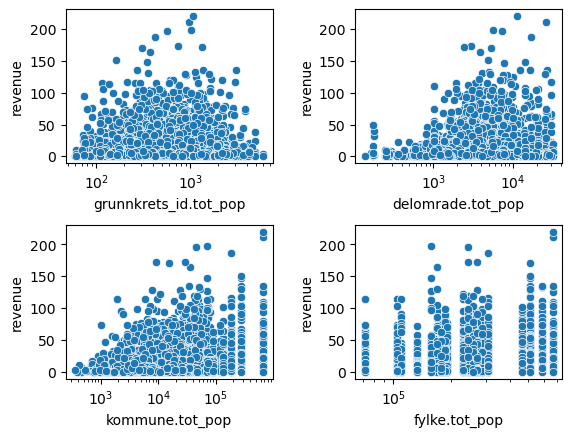

In [94]:
quad_geo_scatter(full_population_df, 'tot_pop', xscale='log')


In [95]:
from constants import levels
full_population_df[['revenue']+[f'{level}.tot_pop' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.tot_pop,delomrade.tot_pop,kommune.tot_pop,fylke.tot_pop
revenue,1.0,0.007021,0.018022,0.007184,0.004849


In [96]:
for level in levels:
    full_population_df[f'{level}.tot_pop_log'] = np.log(full_population_df[f'{level}.tot_pop'])
full_population_df[['revenue']+[f'{level}.tot_pop_log' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.tot_pop_log,delomrade.tot_pop_log,kommune.tot_pop_log,fylke.tot_pop_log
revenue,1.0,0.009356,0.026712,0.02346,0.00518


The log of the total population seems to be more correlated with revenue 

## Area 

In [97]:

area_df = pd.read_csv("data/grunnkrets_norway_stripped.csv")
area_df.shape

(26536, 7)

In [98]:
area_df.head()

,grunnkrets_id,year,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,10010701,2015,Grim-Dueknipen,Grim-Møllevann-Dalane,Kristiansand,MULTIPOLYGON(((7.97199691121304 58.14336769560...,0.768961
1,10010803,2015,Kvadraturen sørøst,Kvadraturen-Eg,Kristiansand,"POLYGON((8.00234207061135 58.1443514886041, 8....",0.361355
2,10020608,2015,Ormestad,Holum,Mandal,"POLYGON((7.48512808482995 58.0374976883392, 7....",0.280188
3,10020901,2015,Tregde,Tregde-Skjernøy,Mandal,MULTIPOLYGON(((7.50996051810658 58.02134863868...,0.156311
4,10030210,2015,Bryneheia,Vanse/Åpta,Farsund,"POLYGON((6.70396719073296 58.0877854965615, 6....",0.791894


In [99]:
new_area_df = preprocess_grunnkrets_df(area_df).drop([ 'grunnkrets_name', 'district_name', 'municipality_name', 'geometry' ], axis = 1)

In [100]:
new_area_df.describe()

,grunnkrets_id,year,area_km2,fylke,kommune,delomrade
count,1.327000e+04,13270.000000,13270.000000,13270.000000,13270.000000,13270.000000
mean,1.002524e+07,2015.999699,1.263028,9.819292,1002.452600,100252.326827
std,5.931629e+06,0.017360,1.643493,5.890494,593.177561,59316.291639
min,1.010102e+06,2015.000000,0.000001,1.000000,101.000000,10101.000000
25%,4.340102e+06,2016.000000,0.209965,4.000000,434.000000,43401.000000
50%,1.017525e+07,2016.000000,0.600853,10.000000,1017.500000,101752.500000
75%,1.566020e+07,2016.000000,1.715737,15.000000,1566.000000,156602.000000
max,2.030050e+07,2016.000000,17.228670,20.000000,2030.000000,203005.000000


In [101]:
full_population_df = join_grouped_df(full_population_df, new_area_df[['area_km2','grunnkrets_id']], 'grunnkrets_id')
full_population_df = join_grouped_df(full_population_df, new_area_df[['area_km2','delomrade']], 'delomrade')
full_population_df = join_grouped_df(full_population_df, new_area_df[['area_km2','kommune']], 'kommune')
full_population_df = join_grouped_df(full_population_df, new_area_df[['area_km2','fylke']], 'fylke')


In [102]:
full_population_df

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,fylke.c_age_31-55_ratio,fylke.c_age_56-90_ratio,grunnkrets_id.tot_pop_log,delomrade.tot_pop_log,kommune.tot_pop_log,fylke.tot_pop_log,grunnkrets_id.area_km2,delomrade.area_km2,kommune.area_km2,fylke.area_km2
2506,990857423-990974489-88185,2016,BAKER KLAUSEN UNION,1.2.2.0,Bakery shop,6020601,GRØNLAND 54,59.743135,10.194627,BAKER KLAUSEN DRAMMEN,...,0.342571,0.284978,6.803505,8.904359,11.111104,12.516084,0.323513,1.969443,42.638211,859.205000
12305,948879220-972145203-18800,2016,PRIKKEN RENS AS,3.4.2.0,Laundromats and dry cleaners,2350203,ENERGIVEGEN 5,60.149288,11.187290,NaN,...,0.353231,0.256358,7.232733,9.401209,10.421984,13.278976,1.170247,9.494818,132.638669,1297.151107
4142,951136751-971668970-6795,2016,EXPERT HOKKSUND,2.3.1.0,Electronics stores,6240307,SUNDMOEN NÆRINGSOMRÅDE,59.768986,9.899066,EXPERT,...,0.342571,0.284978,6.999422,8.451481,9.798238,12.516084,2.214808,15.680468,79.795608,859.205000
8561,980237508-980246167-71346,2016,INVIT AS,2.9.1.0,Gifts and interior design shops,15040206,APOTEKERGATA 9,62.471607,6.151301,NaN,...,0.321983,0.292824,6.452049,8.184235,10.744925,12.468406,0.098487,0.783869,29.398590,1023.445561
818,974421305-974489902-136560,2016,MUCHO MAS,1.1.6.2,Restaurants,3012312,THORVALD MEYERS GATE 36,59.924205,10.759401,NaN,...,0.382839,0.204521,7.153834,9.543020,13.408501,13.408501,0.060921,0.615833,139.782324,139.782324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,916746350-916783280-822890,2016,ILONA AS,2.4.6.0,Clothing stores,18330207,FRIDTJOF NANSENS GATE 12,66.310151,14.136919,NaN,...,0.318605,0.302598,5.811141,8.837246,10.157199,12.345669,0.197898,4.749026,53.107975,1104.128182
3264,917197334-971789727-13321,2016,FARGERIKE REINAAS,2.1.2.0,Paint dealers,16017522,HEIMDALSVEGEN 12,63.348995,10.355104,FARGERIKE,...,0.334046,0.255868,5.765191,9.540795,12.136958,12.637748,0.127998,8.556816,143.834594,1194.071273
9845,916878184-916892322-826818,2016,NEXT FRISØR ÅLESUND,3.2.1.0,Hairdressers,15040101,SKARBØVIKGATA 26,62.466770,6.113498,NaN,...,0.321983,0.292824,6.699500,8.310661,10.744925,12.468406,0.395387,2.219110,29.398590,1023.445561
10799,898250172-998266254-472659,2016,HELSE OG VELVÆRE,3.2.4.0,Spas,12012008,KRINGSJÅVEIEN 83,60.389335,5.286455,NaN,...,0.335980,0.254040,6.481577,9.554285,12.536868,13.141497,0.264717,3.911593,144.907993,918.073470


## Look at households

In [103]:

num_persons_df = pd.read_csv("data/grunnkrets_households_num_persons.csv")
num_persons_df.shape

(26009, 10)

In [104]:
num_persons_df.head()

,grunnkrets_id,year,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
0,12010509,2015,0,0,4,0,0,0,0,4
1,14390206,2015,0,7,0,0,0,0,0,3
2,18040514,2015,10,0,0,0,0,0,0,7
3,18040804,2015,0,0,0,0,0,0,0,0
4,18200101,2015,0,6,0,0,0,0,0,4


In [105]:

num_persons_df.describe()

,grunnkrets_id,year,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
count,2.600900e+04,26009.000000,26009.000000,26009.000000,26009.000000,26009.000000,26009.000000,26009.000000,26009.000000,26009.000000
mean,1.002896e+07,2015.500019,74.124149,29.244915,80.865854,88.010689,6.190396,10.003960,17.490061,80.364335
std,5.929462e+06,0.500010,96.273040,33.258452,98.161437,92.247059,10.911467,12.710166,23.411638,107.537268
min,1.010102e+06,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.320205e+06,2015.000000,17.000000,9.000000,21.000000,28.000000,0.000000,0.000000,0.000000,20.000000
50%,1.018011e+07,2016.000000,43.000000,20.000000,49.000000,58.000000,0.000000,7.000000,10.000000,44.000000
75%,1.563030e+07,2016.000000,94.000000,38.000000,104.000000,116.000000,9.000000,14.000000,24.000000,98.000000
max,2.030050e+07,2016.000000,1729.000000,497.000000,1613.000000,1066.000000,173.000000,173.000000,309.000000,1700.000000


In [106]:
new_num_persons_df = preprocess_grunnkrets_df(num_persons_df)

In [107]:
from utils import num_persons_cols
full_population_df = join_grouped_df(full_population_df, new_num_persons_df[num_persons_cols+['grunnkrets_id']], 'grunnkrets_id')
full_population_df = join_grouped_df(full_population_df, new_num_persons_df[num_persons_cols+['delomrade']], 'delomrade')
full_population_df = join_grouped_df(full_population_df, new_num_persons_df[num_persons_cols+['kommune']], 'kommune')
full_population_df = join_grouped_df(full_population_df, new_num_persons_df[num_persons_cols+['fylke']], 'fylke')


Not sure if total households is correct, as I suspect there might be some overlap

In [108]:
from utils import merge_households_sum

tot_households_grunnkrets = merge_households_sum(new_num_persons_df, 'grunnkrets_id')
tot_households_delomrade = merge_households_sum(new_num_persons_df, 'delomrade')
tot_households_kommune = merge_households_sum(new_num_persons_df, 'kommune')
tot_households_fylke = merge_households_sum(new_num_persons_df, 'fylke')

In [109]:

full_population_df=full_population_df.merge(tot_households_grunnkrets, how='left', right_index=True, left_on='grunnkrets_id')
full_population_df=full_population_df.merge(tot_households_delomrade, how='left', right_index=True, left_on='delomrade')
full_population_df=full_population_df.merge(tot_households_kommune, how='left', right_index=True, left_on='kommune')
full_population_df=full_population_df.merge(tot_households_fylke, how='left', right_index=True, left_on='fylke')

In [110]:
full_population_df.head(1)

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,fylke.couple_children_6_to_17_years,fylke.couple_without_children,fylke.single_parent_children_0_to_5_years,fylke.single_parent_children_18_or_above,fylke.single_parent_children_6_to_17_years,fylke.singles,grunnkrets_id.tot_household,delomrade.tot_household,kommune.tot_household,fylke.tot_household
2506,990857423-990974489-88185,2016,BAKER KLAUSEN UNION,1.2.2.0,Bakery shop,6020601,GRØNLAND 54,59.743135,10.194627,BAKER KLAUSEN DRAMMEN,...,57336,62410,4142,7885,13064,53467,855.0,7067.0,66104,268700


In [111]:
full_population_df[['revenue']+[ f'grunnkrets_id.{i}' for i in num_persons_cols]].corr().head(1)

,revenue,grunnkrets_id.couple_children_0_to_5_years,grunnkrets_id.couple_children_18_or_above,grunnkrets_id.couple_children_6_to_17_years,grunnkrets_id.couple_without_children,grunnkrets_id.single_parent_children_0_to_5_years,grunnkrets_id.single_parent_children_18_or_above,grunnkrets_id.single_parent_children_6_to_17_years,grunnkrets_id.singles
revenue,1.0,0.008058,0.008301,0.010334,-0.010858,0.001925,0.011458,0.004419,-0.016241


In [112]:
full_population_df[['revenue']+[ f'delomrade.{i}' for i in num_persons_cols]].corr().head(1)

,revenue,delomrade.couple_children_0_to_5_years,delomrade.couple_children_18_or_above,delomrade.couple_children_6_to_17_years,delomrade.couple_without_children,delomrade.single_parent_children_0_to_5_years,delomrade.single_parent_children_18_or_above,delomrade.single_parent_children_6_to_17_years,delomrade.singles
revenue,1.0,0.024963,0.023119,0.024282,0.014731,0.011801,0.024854,0.025693,0.005292


In [113]:
full_population_df[['revenue']+[ f'kommune.{i}' for i in num_persons_cols]].corr().head(1)

,revenue,kommune.couple_children_0_to_5_years,kommune.couple_children_18_or_above,kommune.couple_children_6_to_17_years,kommune.couple_without_children,kommune.single_parent_children_0_to_5_years,kommune.single_parent_children_18_or_above,kommune.single_parent_children_6_to_17_years,kommune.singles
revenue,1.0,0.006808,0.010492,0.009157,0.00868,0.003367,0.008653,0.007297,0.006167


In [114]:
full_population_df[['revenue']+[ f'fylke.{i}' for i in num_persons_cols]].corr().head(1)

,revenue,fylke.couple_children_0_to_5_years,fylke.couple_children_18_or_above,fylke.couple_children_6_to_17_years,fylke.couple_without_children,fylke.single_parent_children_0_to_5_years,fylke.single_parent_children_18_or_above,fylke.single_parent_children_6_to_17_years,fylke.singles
revenue,1.0,0.004194,0.006281,0.004328,0.006235,0.000363,0.007542,0.003589,0.004935


In [115]:
levels = ['grunnkrets_id', 'delomrade', 'kommune', 'fylke']
full_population_df[['revenue']+[f'{level}.tot_household' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.tot_household,delomrade.tot_household,kommune.tot_household,fylke.tot_household
revenue,1.0,-0.002484,0.018962,0.007577,0.005142


In [116]:
full_population_df.columns.shape

(151,)

## Income

In [117]:
income_df = pd.read_csv("data/grunnkrets_income_households.csv")
income_df.shape

(26530, 8)

In [118]:
income_df.head()

,grunnkrets_id,year,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,14200105,2016,551700,270300,0,0,0,0
1,2311202,2015,577700,311800,0,682300,0,0
2,2310501,2015,668800,292500,0,842000,0,0
3,14200401,2016,507000,250700,0,0,0,0
4,14200105,2015,539900,275800,0,710300,0,0


In [119]:
new_income_df = preprocess_grunnkrets_df(income_df)
income_cols = ['all_households', 'singles', 'couple_without_children',	'couple_with_children', 'other_households',	'single_parent_with_children']
new_names = [(i,i+'_income') for i in income_cols]
new_income_cols = list(map(lambda t: t[1], new_names))
new_income_df.rename(columns = dict(new_names), inplace=True)

In [120]:

new_income_df.describe()

,grunnkrets_id,year,all_households_income,singles_income,couple_without_children_income,couple_with_children_income,other_households_income,single_parent_with_children_income,fylke,kommune,delomrade
count,1.326900e+04,13269.000000,13269.000000,13269.000000,13269.000000,1.326900e+04,1.326900e+04,13269.000000,13269.000000,13269.000000,13269.000000
mean,1.002577e+07,2015.999699,509904.657472,278061.150049,606118.004371,7.576799e+05,7.532133e+05,367578.702238,9.819806,1002.505464,100257.609466
std,5.931540e+06,0.017360,77041.335633,21716.663249,60517.512364,1.684715e+05,1.961871e+05,115282.944573,5.890418,593.168653,59315.405173
min,1.010102e+06,2015.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,101.000000,10101.000000
25%,4.340103e+06,2016.000000,457600.000000,263400.000000,570500.000000,7.291000e+05,7.329000e+05,370700.000000,4.000000,434.000000,43401.000000
50%,1.018010e+07,2016.000000,501400.000000,276200.000000,599300.000000,7.693000e+05,7.902000e+05,394800.000000,10.000000,1018.000000,101801.000000
75%,1.566020e+07,2016.000000,558900.000000,292100.000000,632900.000000,8.143000e+05,8.473000e+05,417300.000000,15.000000,1566.000000,156602.000000
max,2.030050e+07,2016.000000,861900.000000,462500.000000,904800.000000,1.312100e+06,1.109600e+06,572800.000000,20.000000,2030.000000,203005.000000


In [121]:
from utils import join_grouped_df_avg
full_population_df = join_grouped_df_avg(full_population_df, new_income_df[new_income_cols+['grunnkrets_id']], 'grunnkrets_id')
full_population_df = join_grouped_df_avg(full_population_df, new_income_df[new_income_cols+['delomrade']], 'delomrade')
full_population_df = join_grouped_df_avg(full_population_df, new_income_df[new_income_cols+['kommune']], 'kommune')
full_population_df = join_grouped_df_avg(full_population_df, new_income_df[new_income_cols+['fylke']], 'fylke')


In [122]:
full_population_df

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,kommune.couple_without_children_income,kommune.couple_with_children_income,kommune.other_households_income,kommune.single_parent_with_children_income,fylke.all_households_income,fylke.singles_income,fylke.couple_without_children_income,fylke.couple_with_children_income,fylke.other_households_income,fylke.single_parent_with_children_income
2506,990857423-990974489-88185,2016,BAKER KLAUSEN UNION,1.2.2.0,Bakery shop,6020601,GRØNLAND 54,59.743135,10.194627,BAKER KLAUSEN DRAMMEN,...,622622.580645,776525.806452,760959.677419,389419.892473,512753.284672,280906.277372,615335.912409,776264.379562,795741.459854,398502.919708
12305,948879220-972145203-18800,2016,PRIKKEN RENS AS,3.4.2.0,Laundromats and dry cleaners,2350203,ENERGIVEGEN 5,60.149288,11.187290,NaN,...,631696.078431,668298.039216,765878.431373,347649.019608,589587.580761,300160.301508,679852.261307,883807.035176,850532.376167,428280.402010
4142,951136751-971668970-6795,2016,EXPERT HOKKSUND,2.3.1.0,Electronics stores,6240307,SUNDMOEN NÆRINGSOMRÅDE,59.768986,9.899066,EXPERT,...,601397.297297,767056.756757,786986.486486,386645.945946,512753.284672,280906.277372,615335.912409,776264.379562,795741.459854,398502.919708
8561,980237508-980246167-71346,2016,INVIT AS,2.9.1.0,Gifts and interior design shops,15040206,APOTEKERGATA 9,62.471607,6.151301,NaN,...,628010.909091,789296.363636,759500.000000,410290.909091,515067.292225,270737.131367,597728.150134,751447.721180,745691.689008,352163.270777
818,974421305-974489902-136560,2016,MUCHO MAS,1.1.6.2,Restaurants,3012312,THORVALD MEYERS GATE 36,59.924205,10.759401,NaN,...,674976.491863,829752.622061,701220.072333,392790.958409,465401.627486,302411.211573,674976.491863,829752.622061,701220.072333,392790.958409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,916746350-916783280-822890,2016,ILONA AS,2.4.6.0,Clothing stores,18330207,FRIDTJOF NANSENS GATE 12,66.310151,14.136919,NaN,...,588318.750000,760498.437500,794195.312500,398489.062500,482459.185700,268868.421053,582596.226415,716477.557100,785979.841112,365677.656405
3264,917197334-971789727-13321,2016,FARGERIKE REINAAS,2.1.2.0,Paint dealers,16017522,HEIMDALSVEGEN 12,63.348995,10.355104,FARGERIKE,...,612256.410256,817676.223776,757244.522145,414125.174825,508632.214061,276269.150052,591977.964323,753589.926548,761479.223505,370522.245540
9845,916878184-916892322-826818,2016,NEXT FRISØR ÅLESUND,3.2.1.0,Hairdressers,15040101,SKARBØVIKGATA 26,62.466770,6.113498,NaN,...,628010.909091,789296.363636,759500.000000,410290.909091,515067.292225,270737.131367,597728.150134,751447.721180,745691.689008,352163.270777
10799,898250172-998266254-472659,2016,HELSE OG VELVÆRE,3.2.4.0,Spas,12012008,KRINGSJÅVEIEN 83,60.389335,5.286455,NaN,...,617838.504155,806721.883657,745524.099723,404060.941828,524763.704397,282530.308700,606644.621141,788729.092610,751608.138447,371844.153414


In [123]:
full_population_df[['revenue']+[ f'grunnkrets_id.{i}_income' for i in income_cols]].corr().head(1)

,revenue,grunnkrets_id.all_households_income,grunnkrets_id.singles_income,grunnkrets_id.couple_without_children_income,grunnkrets_id.couple_with_children_income,grunnkrets_id.other_households_income,grunnkrets_id.single_parent_with_children_income
revenue,1.0,0.032146,0.032608,0.010565,0.014198,0.022106,0.024869


In [124]:
full_population_df[['revenue']+[ f'delomrade.{i}_income' for i in income_cols]].corr().head(1)

,revenue,delomrade.all_households_income,delomrade.singles_income,delomrade.couple_without_children_income,delomrade.couple_with_children_income,delomrade.other_households_income,delomrade.single_parent_with_children_income
revenue,1.0,0.031927,0.032822,0.010707,0.014385,0.021992,0.025213


In [125]:
full_population_df[['revenue']+[ f'kommune.{i}_income' for i in income_cols]].corr().head(1)

,revenue,kommune.all_households_income,kommune.singles_income,kommune.couple_without_children_income,kommune.couple_with_children_income,kommune.other_households_income,kommune.single_parent_with_children_income
revenue,1.0,-0.003404,0.018274,0.004008,0.0055,-0.000988,0.013619


In [126]:
full_population_df[['revenue']+[ f'fylke.{i}_income' for i in income_cols]].corr().head(1)

,revenue,fylke.all_households_income,fylke.singles_income,fylke.couple_without_children_income,fylke.couple_with_children_income,fylke.other_households_income,fylke.single_parent_with_children_income
revenue,1.0,-0.001688,0.004142,-0.000088,-0.000596,0.008542,0.007453


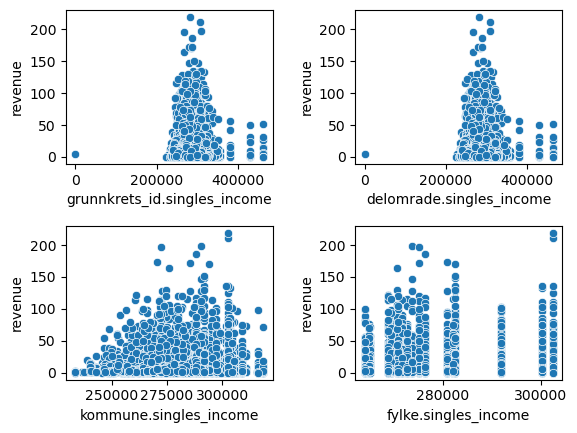

In [127]:
quad_geo_scatter(full_population_df, 'singles_income')


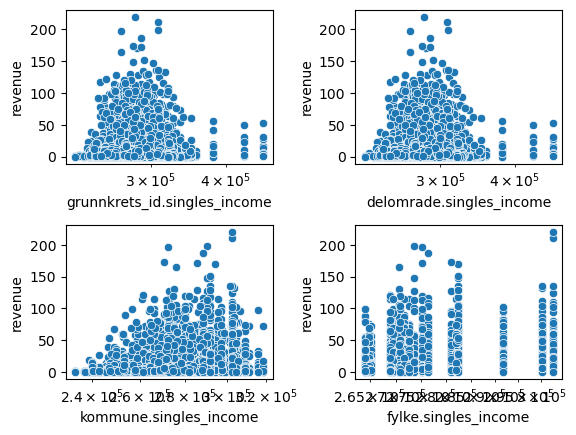

In [128]:
quad_geo_scatter(full_population_df, 'singles_income', xscale='log')


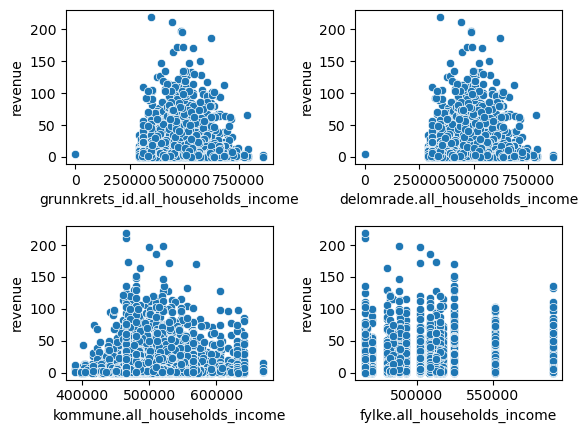

In [129]:
quad_geo_scatter(full_population_df, 'all_households_income')


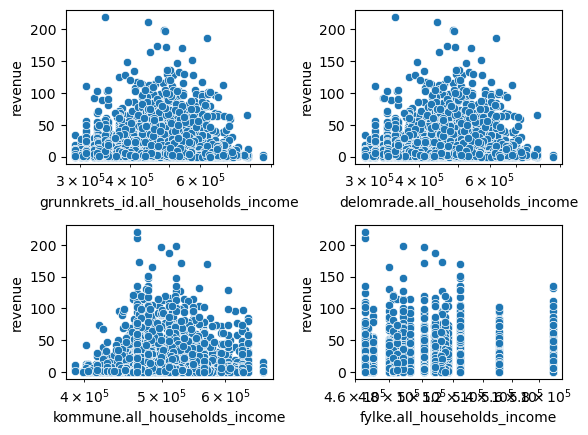

In [130]:
quad_geo_scatter(full_population_df, 'all_households_income', xscale='log')


We see that there might be some outliers here

### Combine income and households 

In [131]:
full_population_df['grunnkrets_id.total_income']  = full_population_df['grunnkrets_id.all_households_income']*full_population_df['grunnkrets_id.tot_household']
full_population_df['delomrade.total_income']  = full_population_df['delomrade.all_households_income']*full_population_df['delomrade.tot_household']
full_population_df['kommune.total_income']  = full_population_df['kommune.all_households_income']*full_population_df['kommune.tot_household']
full_population_df['fylke.total_income']  = full_population_df['fylke.all_households_income']*full_population_df['fylke.tot_household']

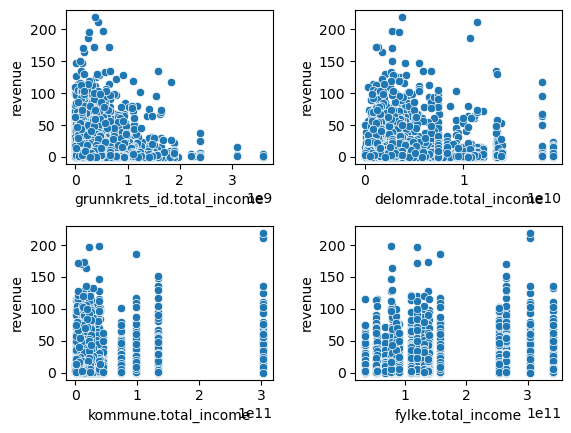

In [132]:
quad_geo_scatter(full_population_df, 'total_income')


In [133]:
full_population_df[['revenue'] + [f'{level}.total_income' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.total_income,delomrade.total_income,kommune.total_income,fylke.total_income
revenue,1.0,0.003614,0.02276,0.007824,0.004693


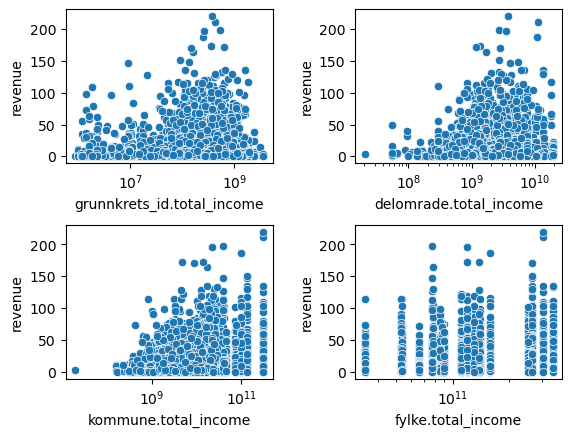

In [134]:
quad_geo_scatter(full_population_df, 'total_income', xscale='log')


Log looks more promising

In [135]:
full_population_df['grunnkrets_id.total_income_log']  = np.log1p(full_population_df['grunnkrets_id.all_households_income']*full_population_df['grunnkrets_id.tot_household'])
full_population_df['delomrade.total_income_log']  = np.log1p(full_population_df['delomrade.all_households_income']*full_population_df['delomrade.tot_household'])
full_population_df['kommune.total_income_log']  = np.log1p(full_population_df['kommune.all_households_income']*full_population_df['kommune.tot_household'])
full_population_df['fylke.total_income_log']  = np.log1p(full_population_df['fylke.all_households_income']*full_population_df['fylke.tot_household'])

In [136]:
full_population_df[['revenue'] + [f'{level}.total_income_log' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.total_income_log,delomrade.total_income_log,kommune.total_income_log,fylke.total_income_log
revenue,1.0,-0.031601,0.033948,0.0237,0.005088


In [137]:
full_population_df['grunnkrets_id.income_density']  = full_population_df['grunnkrets_id.total_income']/full_population_df['grunnkrets_id.area_km2']
full_population_df['delomrade.income_density']  = full_population_df['delomrade.total_income']/full_population_df['delomrade.area_km2']
full_population_df['kommune.income_density']  = full_population_df['kommune.total_income']/full_population_df['kommune.area_km2']
full_population_df['fylke.income_density']  = full_population_df['fylke.total_income']/full_population_df['fylke.area_km2']

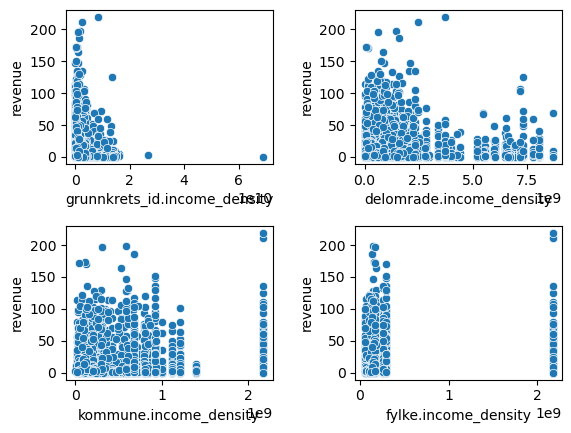

In [138]:
quad_geo_scatter(full_population_df, 'income_density')


In [139]:
full_population_df[['revenue'] + [f'{level}.income_density' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.income_density,delomrade.income_density,kommune.income_density,fylke.income_density
revenue,1.0,-0.032173,-0.010781,0.002872,-0.000496


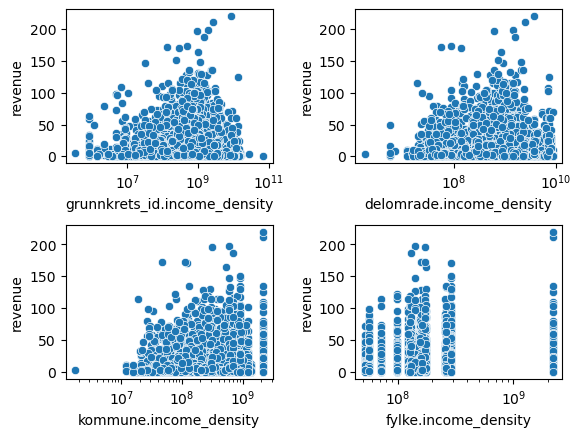

In [140]:
quad_geo_scatter(full_population_df, 'income_density', xscale='log')


In [141]:
full_population_df['grunnkrets_id.income_density_log']  = np.log1p(full_population_df['grunnkrets_id.total_income']/full_population_df['grunnkrets_id.area_km2'])
full_population_df['delomrade.income_density_log']  = np.log1p(full_population_df['delomrade.total_income']/full_population_df['delomrade.area_km2'])
full_population_df['kommune.income_density_log']  = np.log1p(full_population_df['kommune.total_income']/full_population_df['kommune.area_km2'])
full_population_df['fylke.income_density_log']  = np.log1p(full_population_df['fylke.total_income']/full_population_df['fylke.area_km2'])

In [142]:
full_population_df[['revenue'] + [f'{level}.income_density_log' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.income_density_log,delomrade.income_density_log,kommune.income_density_log,fylke.income_density_log
revenue,1.0,-0.054621,0.000576,0.014032,0.006418


This could maybe also be combined with store density

### Population density

In [143]:
for level in levels:
    full_population_df[f'{level}.pop_density'] = full_population_df[f'{level}.tot_pop']/full_population_df[f'{level}.area_km2']
    full_population_df[f'{level}.pop_density_log'] = np.log1p(full_population_df[f'{level}.tot_pop']/full_population_df[f'{level}.area_km2'])


In [144]:
full_population_df[['revenue'] + [f'{level}.pop_density' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.pop_density,delomrade.pop_density,kommune.pop_density,fylke.pop_density
revenue,1.0,-0.029476,-0.013859,0.003216,-0.000579


In [145]:
full_population_df[['revenue'] + [f'{level}.pop_density_log' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.pop_density_log,delomrade.pop_density_log,kommune.pop_density_log,fylke.pop_density_log
revenue,1.0,-0.033183,-0.004951,0.013769,0.00622


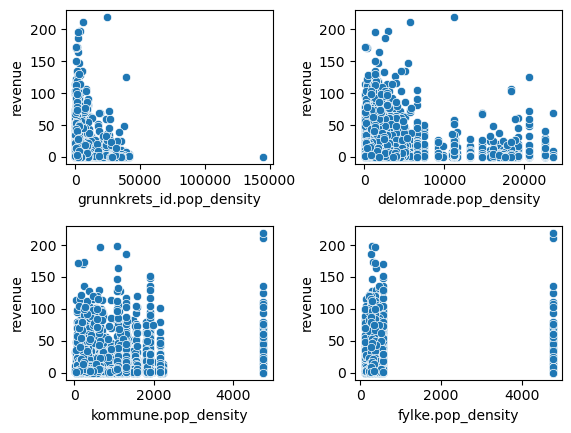

In [146]:
quad_geo_scatter(full_population_df, 'pop_density')


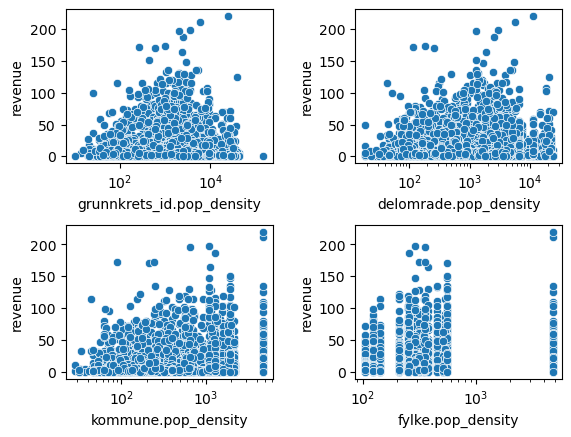

In [147]:
quad_geo_scatter(full_population_df, 'pop_density', xscale='log')


### Number of stores

In [166]:
num_stores = pd.read_csv('temp_data/num_stores.csv')
num_stores_df = pd.merge(full_population_df, num_stores, on='store_id', how='left')

In [170]:
list( num_stores_df.columns )

['store_id',
 'year',
 'store_name',
 'plaace_hierarchy_id_x',
 'sales_channel_name',
 'grunnkrets_id_x',
 'address',
 'lat',
 'lon',
 'chain_name',
 'mall_name',
 'revenue',
 'fylke_x',
 'kommune_x',
 'delomrade_x',
 'grunnkrets_id.age_0-6',
 'grunnkrets_id.age_7-13',
 'grunnkrets_id.age_14-20',
 'grunnkrets_id.age_21-27',
 'grunnkrets_id.age_28-34',
 'grunnkrets_id.age_35-41',
 'grunnkrets_id.age_42-48',
 'grunnkrets_id.age_49-55',
 'grunnkrets_id.age_56-62',
 'grunnkrets_id.age_63-69',
 'grunnkrets_id.age_70-76',
 'grunnkrets_id.age_77-83',
 'grunnkrets_id.age_84-90',
 'delomrade.age_0-6',
 'delomrade.age_7-13',
 'delomrade.age_14-20',
 'delomrade.age_21-27',
 'delomrade.age_28-34',
 'delomrade.age_35-41',
 'delomrade.age_42-48',
 'delomrade.age_49-55',
 'delomrade.age_56-62',
 'delomrade.age_63-69',
 'delomrade.age_70-76',
 'delomrade.age_77-83',
 'delomrade.age_84-90',
 'kommune.age_0-6',
 'kommune.age_7-13',
 'kommune.age_14-20',
 'kommune.age_21-27',
 'kommune.age_28-34',
 'komm

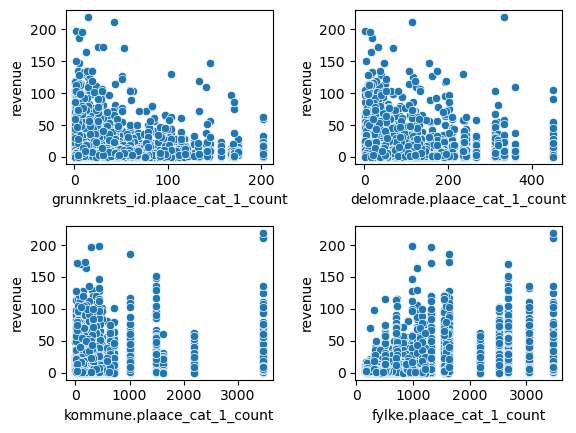

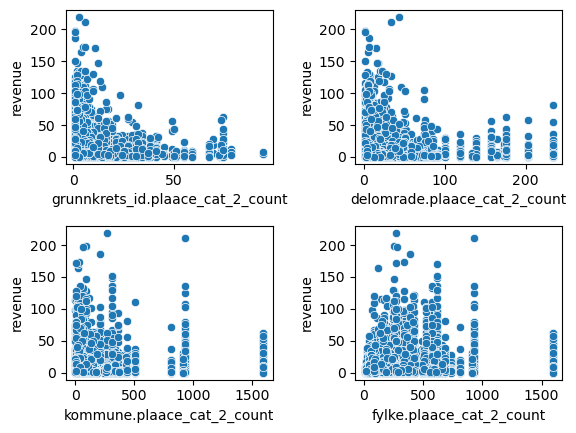

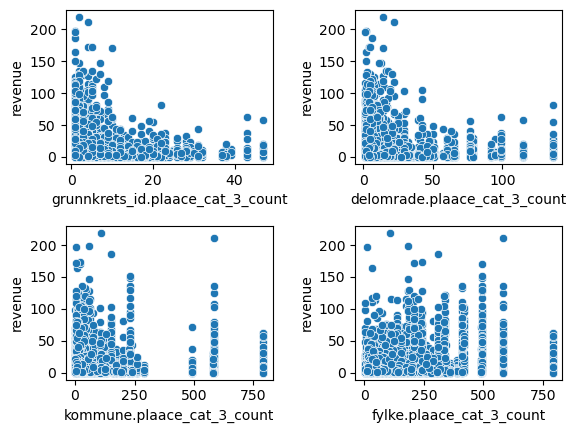

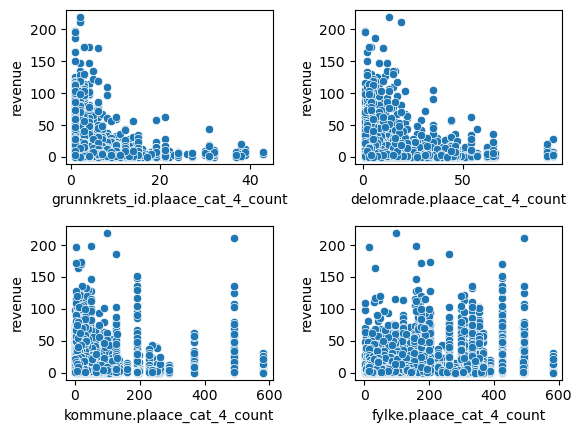

In [158]:
from constants import *
for cat in plaace_cols:
    quad_geo_scatter(num_stores_df, f'{cat}_count')

In [160]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_1_count' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_1_count,delomrade.plaace_cat_1_count,kommune.plaace_cat_1_count,fylke.plaace_cat_1_count
revenue,1.0,0.04622,0.058717,0.057294,0.167402


In [163]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_2_count' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_2_count,delomrade.plaace_cat_2_count,kommune.plaace_cat_2_count,fylke.plaace_cat_2_count
revenue,1.0,-0.017245,-0.006837,0.008128,0.027939


In [164]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_3_count' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_3_count,delomrade.plaace_cat_3_count,kommune.plaace_cat_3_count,fylke.plaace_cat_3_count
revenue,1.0,0.011179,0.02387,0.036028,0.15309


In [165]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_4_count' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_4_count,delomrade.plaace_cat_4_count,kommune.plaace_cat_4_count,fylke.plaace_cat_4_count
revenue,1.0,-0.017586,0.000531,0.03195,0.161784


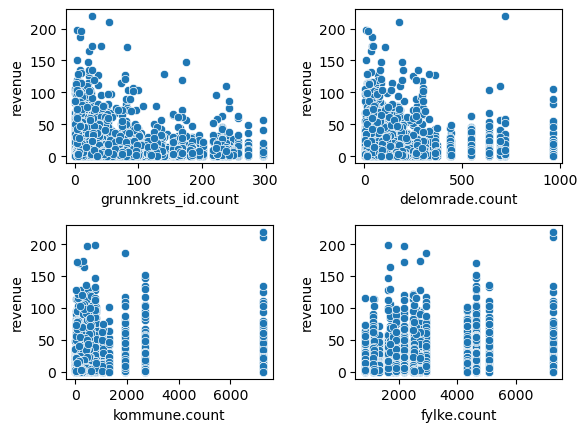

In [167]:
quad_geo_scatter(num_stores_df, 'count')

In [168]:

num_stores_df[['revenue'] + [f'{level}.count' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.count,delomrade.count,kommune.count,fylke.count
revenue,1.0,-0.012793,-0.005773,0.006751,0.003436


### Number of stores interactions

In [217]:
num_stores_df['log_revenue'] = np.log1p(num_stores_df['revenue'])

In [231]:
for level in levels:
    for cat in plaace_cols:
        num_stores_df[f'{level}.{cat}_per_capita'] = num_stores_df[f'{level}.{cat}_count'] / num_stores_df[f'{level}.tot_pop']

In [199]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_1_per_capita' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_1_per_capita,delomrade.plaace_cat_1_per_capita,kommune.plaace_cat_1_per_capita,fylke.plaace_cat_1_per_capita
revenue,1.0,0.011993,0.02751,0.204476,0.250646


In [200]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_2_per_capita' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_2_per_capita,delomrade.plaace_cat_2_per_capita,kommune.plaace_cat_2_per_capita,fylke.plaace_cat_2_per_capita
revenue,1.0,-0.011821,-0.002396,0.010652,0.060561


In [201]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_3_per_capita' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_3_per_capita,delomrade.plaace_cat_3_per_capita,kommune.plaace_cat_3_per_capita,fylke.plaace_cat_3_per_capita
revenue,1.0,0.007349,0.013197,0.119191,0.250141


In [202]:

num_stores_df[['revenue'] + [f'{level}.plaace_cat_4_per_capita' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_4_per_capita,delomrade.plaace_cat_4_per_capita,kommune.plaace_cat_4_per_capita,fylke.plaace_cat_4_per_capita
revenue,1.0,-0.01315,-0.002612,0.096388,0.25173


In [178]:
for level in levels:
    for cat in plaace_cols:
        num_stores_df[f'{level}.{cat}_per_km2'] = num_stores_df[f'{level}.{cat}_count'] / num_stores_df[f'{level}.area_km2']

In [179]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_1_per_km2' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_1_per_km2,delomrade.plaace_cat_1_per_km2,kommune.plaace_cat_1_per_km2,fylke.plaace_cat_1_per_km2
revenue,1.0,0.001923,0.015579,0.078759,0.049149


In [180]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_2_per_km2' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_2_per_km2,delomrade.plaace_cat_2_per_km2,kommune.plaace_cat_2_per_km2,fylke.plaace_cat_2_per_km2
revenue,1.0,-0.023678,-0.012952,0.005736,0.006557


In [181]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_3_per_km2' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_3_per_km2,delomrade.plaace_cat_3_per_km2,kommune.plaace_cat_3_per_km2,fylke.plaace_cat_3_per_km2
revenue,1.0,-0.010453,-0.00009,0.049087,0.037025


In [182]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_4_per_km2' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_4_per_km2,delomrade.plaace_cat_4_per_km2,kommune.plaace_cat_4_per_km2,fylke.plaace_cat_4_per_km2
revenue,1.0,-0.019765,-0.019886,0.04489,0.03656


In [232]:
for level in levels:
    for cat in plaace_cols:
        num_stores_df[f'{level}.{cat}_per_tot_income'] = num_stores_df[f'{level}.{cat}_count'] / num_stores_df[f'{level}.total_income']
        num_stores_df[f'{level}.{cat}_per_tot_income_log'] = np.log1p(num_stores_df[f'{level}.{cat}_per_tot_income'])

In [209]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_1_per_tot_income' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_1_per_tot_income,delomrade.plaace_cat_1_per_tot_income,kommune.plaace_cat_1_per_tot_income,fylke.plaace_cat_1_per_tot_income
revenue,1.0,0.033652,0.019525,0.194004,0.245292


In [210]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_2_per_tot_income' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_2_per_tot_income,delomrade.plaace_cat_2_per_tot_income,kommune.plaace_cat_2_per_tot_income,fylke.plaace_cat_2_per_tot_income
revenue,1.0,0.021205,-0.001557,0.008637,0.058272


In [211]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_3_per_tot_income' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_3_per_tot_income,delomrade.plaace_cat_3_per_tot_income,kommune.plaace_cat_3_per_tot_income,fylke.plaace_cat_3_per_tot_income
revenue,1.0,0.017999,0.010237,0.100757,0.242079


In [212]:
num_stores_df[['revenue'] + [f'{level}.plaace_cat_4_per_tot_income' for level in levels]].corr().head(1)

,revenue,grunnkrets_id.plaace_cat_4_per_tot_income,delomrade.plaace_cat_4_per_tot_income,kommune.plaace_cat_4_per_tot_income,fylke.plaace_cat_4_per_tot_income
revenue,1.0,0.016739,-0.004125,0.080292,0.247218


## Impute nans

In [ ]:
from constants import levels


def impute_geography(row: pd.Series):
    def impute_geography_internal(new_row: pd.Series, i: int):
        for col in row.index:
            if column.startswith(levels[::-1][i+1]):
                new_row[col] = new_row[col.replace(levels[::-1][i+1], levels[::-1][i])]
    new_row = row.copy()
    for i, level in enumerate(levels[::-1][1:]):
        has_nans = False
        for column in row.index:
            if column.startswith(level) and np.isnan(new_row[column]):
                has_nans = True
                break
        if has_nans:
            impute_geography_internal(new_row, i)
    return new_row

    
    
full_population_df = full_population_df.apply(impute_geography, axis = 1)

In [72]:

full_population_df['grunnkrets_id.mean_age'].describe()

count    10287.000000
mean        41.047787
std          6.160971
min         25.311441
25%         36.670138
50%         40.539116
75%         44.315515
max         74.410811
Name: grunnkrets_id.mean_age, dtype: float64

## Some data analysis 

/home/halvorlinder/NTNU/Machine_Learning/TDT4173/plot_utils.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


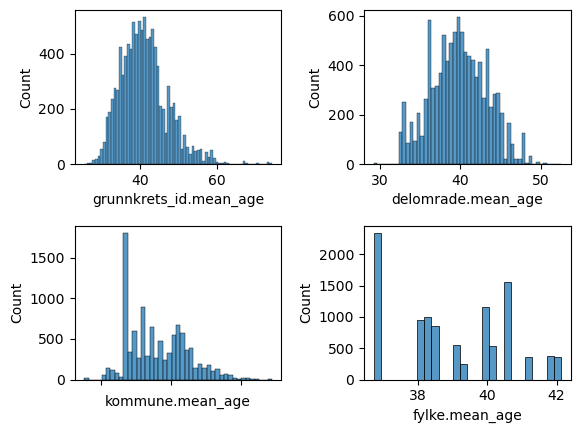

In [80]:
from plot_utils import quad_geo_histogram
quad_geo_histogram(full_population_df, 'mean_age')

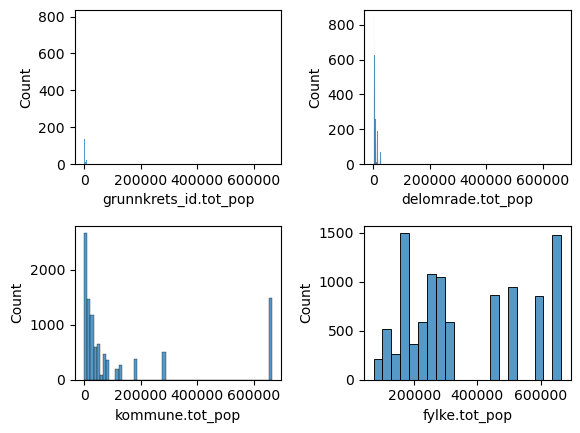

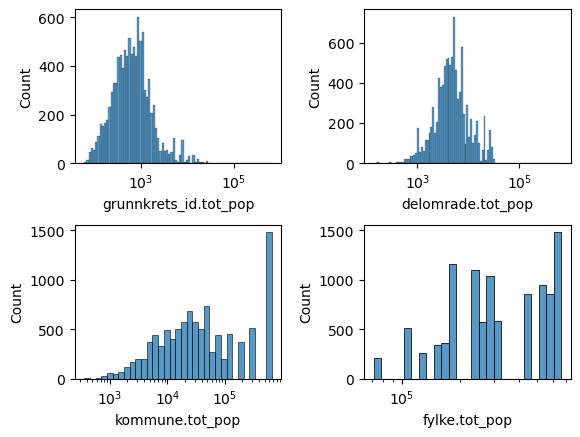

In [85]:
from plot_utils import quad_geo_histogram
quad_geo_histogram(full_population_df, 'tot_pop', log=False)
quad_geo_histogram(full_population_df, 'tot_pop', log=True)

We should consider taking the log an removing the outliers

## Preprocessing ALL the dataframes :)

In [74]:
age_distribution = pd.read_csv("data/grunnkrets_age_distribution.csv")
households_num_persons = pd.read_csv("data/grunnkrets_households_num_persons.csv")
income_households = pd.read_csv("data/grunnkrets_income_households.csv")
norway_stripped = pd.read_csv("data/grunnkrets_norway_stripped.csv")


In [75]:
# add all dataframes to dict
grunnkrets_dfs = {
    "age_distribution" : age_distribution, 
    "households_num_persons" : households_num_persons, 
    "income_households" : income_households, 
    "norway_stripped" : norway_stripped, 
    }

In [76]:
# preprocess dataframes
for df_name, df in grunnkrets_dfs.items():
    grunnkrets_dfs[df_name] = preprocess_grunnkrets_df(df)

# group age categories and sum up values
# span_size determines how many age-columns should be grouped each time
span_size = 7 # I chose 7 because it is a prime factor of 91, and makes all spans have same size
grunnkrets_dfs["age_distribution"] = group_age_columns(age_distribution_df=grunnkrets_dfs["age_distribution"], span_size=span_size)

In [77]:
# add dataframes grouped by fylke, kommune and delomrade
for df_name, df in grunnkrets_dfs.copy().items():
    grunnkrets_dfs[df_name + "_fylke"] = group_df(df, "fylke")
    grunnkrets_dfs[df_name + "_kommune"] = group_df(df, "kommune")
    grunnkrets_dfs[df_name + "_delomrade"] = group_df(df, "delomrade")


In [78]:
grunnkrets_dfs.keys()

dict_keys(['age_distribution', 'households_num_persons', 'income_households', 'norway_stripped', 'age_distribution_fylke', 'age_distribution_kommune', 'age_distribution_delomrade', 'households_num_persons_fylke', 'households_num_persons_kommune', 'households_num_persons_delomrade', 'income_households_fylke', 'income_households_kommune', 'income_households_delomrade', 'norway_stripped_fylke', 'norway_stripped_kommune', 'norway_stripped_delomrade'])

In [79]:
grunnkrets_dfs["age_distribution"]

,grunnkrets_id,year,fylke,kommune,delomrade,age_0-6,age_7-13,age_14-20,age_21-27,age_28-34,age_35-41,age_42-48,age_49-55,age_56-62,age_63-69,age_70-76,age_77-83,age_84-90
6784,2190812,2015,2,219,21908,0,0,0,3,16,21,18,14,7,1,0,0,0
8175,2190914,2015,2,219,21909,29,54,46,35,23,32,44,47,33,22,12,7,5
8529,20300310,2015,20,2030,203003,2,0,6,16,24,11,7,7,7,0,0,0,0
8577,5170101,2015,5,517,51701,2,0,5,19,32,14,1,0,3,0,0,0,0
16348,2191013,2015,2,219,21910,71,70,36,44,63,76,67,50,47,37,28,25,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062,1061804,2016,1,106,10618,28,26,25,42,33,31,41,49,48,56,29,8,9
10064,1063202,2016,1,106,10632,28,36,35,33,28,38,42,39,35,27,18,11,5
10065,11010402,2016,11,1101,110104,21,18,25,56,32,37,44,45,39,35,26,16,8
10038,9260106,2016,9,926,92601,30,38,26,21,24,31,35,39,42,47,26,9,5


In [174]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

full_population_df.head(1)

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,fylke,kommune,delomrade,grunnkrets_id.age_0-6,grunnkrets_id.age_7-13,grunnkrets_id.age_14-20,grunnkrets_id.age_21-27,grunnkrets_id.age_28-34,grunnkrets_id.age_35-41,grunnkrets_id.age_42-48,grunnkrets_id.age_49-55,grunnkrets_id.age_56-62,grunnkrets_id.age_63-69,grunnkrets_id.age_70-76,grunnkrets_id.age_77-83,grunnkrets_id.age_84-90,delomrade.age_0-6,delomrade.age_7-13,delomrade.age_14-20,delomrade.age_21-27,delomrade.age_28-34,delomrade.age_35-41,delomrade.age_42-48,delomrade.age_49-55,delomrade.age_56-62,delomrade.age_63-69,delomrade.age_70-76,delomrade.age_77-83,delomrade.age_84-90,kommune.age_0-6,kommune.age_7-13,kommune.age_14-20,kommune.age_21-27,kommune.age_28-34,kommune.age_35-41,kommune.age_42-48,kommune.age_49-55,kommune.age_56-62,kommune.age_63-69,kommune.age_70-76,kommune.age_77-83,kommune.age_84-90,fylke.age_0-6,fylke.age_7-13,fylke.age_14-20,fylke.age_21-27,fylke.age_28-34,fylke.age_35-41,fylke.age_42-48,fylke.age_49-55,fylke.age_56-62,fylke.age_63-69,fylke.age_70-76,fylke.age_77-83,fylke.age_84-90,grunnkrets_id.mean_age,delomrade.mean_age,kommune.mean_age,fylke.mean_age,grunnkrets_id.tot_pop,delomrade.tot_pop,kommune.tot_pop,fylke.tot_pop,grunnkrets_id.tot_pop_log,delomrade.tot_pop_log,kommune.tot_pop_log,fylke.tot_pop_log,grunnkrets_id.couple_children_0_to_5_years,grunnkrets_id.couple_children_18_or_above,grunnkrets_id.couple_children_6_to_17_years,grunnkrets_id.couple_without_children,grunnkrets_id.single_parent_children_0_to_5_years,grunnkrets_id.single_parent_children_18_or_above,grunnkrets_id.single_parent_children_6_to_17_years,grunnkrets_id.singles,delomrade.couple_children_0_to_5_years,delomrade.couple_children_18_or_above,delomrade.couple_children_6_to_17_years,delomrade.couple_without_children,delomrade.single_parent_children_0_to_5_years,delomrade.single_parent_children_18_or_above,delomrade.single_parent_children_6_to_17_years,delomrade.singles,kommune.couple_children_0_to_5_years,kommune.couple_children_18_or_above,kommune.couple_children_6_to_17_years,kommune.couple_without_children,kommune.single_parent_children_0_to_5_years,kommune.single_parent_children_18_or_above,kommune.single_parent_children_6_to_17_years,kommune.singles,fylke.couple_children_0_to_5_years,fylke.couple_children_18_or_above,fylke.couple_children_6_to_17_years,fylke.couple_without_children,fylke.single_parent_children_0_to_5_years,fylke.single_parent_children_18_or_above,fylke.single_parent_children_6_to_17_years,fylke.singles,grunnkrets_id.tot_household,delomrade.tot_household,kommune.tot_household,fylke.tot_household,grunnkrets_id.all_households_income,grunnkrets_id.singles_income,grunnkrets_id.couple_without_children_income,grunnkrets_id.couple_with_children_income,grunnkrets_id.other_households_income,grunnkrets_id.single_parent_with_children_income,delomrade.all_households_income,delomrade.singles_income,delomrade.couple_without_children_income,delomrade.couple_with_children_income,delomrade.other_households_income,delomrade.single_parent_with_children_income,kommune.all_households_income,kommune.singles_income,kommune.couple_without_children_income,kommune.couple_with_children_income,kommune.other_households_income,kommune.single_parent_with_children_income,fylke.all_households_income,fylke.singles_income,fylke.couple_without_children_income,fylke.couple_with_children_income,fylke.other_households_income,fylke.single_parent_with_children_income
2506,990857423-990974489-88185,2016,BAKER KLAUSEN UNION,1.2.2.0,Bakery shop,6020601,GRØNLAND 54,59.743135,10.194627,BAKER KLAUSEN DRAMMEN,NaN,4.447,6,602,60206,16.0,11.0,29.0,150.0,112.0,61.0,54.0,79.0,109.0,113.0,82.0,56.0,26.0,528.0,403.0,434.0,1030.0,1228.0,856.0,598.0,546.0,510.0,496.0,359.0,236.0,126.0,5483,5514,5392,6172,7162,6806,6333,5909,5083,5203,3955,2492,1281,21842,23189,23641,22613,24613,26311,26937,25832,22890,22511,16409,10207,5207,48.224195,38.48